<a href="https://colab.research.google.com/github/AnsariBisma/Big-Mart-Sales_LinearRegression/blob/main/Edu_Fund_Data_Analysis_Bisma_Ansari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Task 1: Data Exploration and Understanding**
Gain a deep understanding of the Edufund platform and its data sources.
Identify key user attributes and behaviors relevant to goal creation and investment.
Create a synthetic dataset that simulates user behavior and characteristics, based on your
knowledge and assumptions.
Create a data dictionary to document the variables in the synthetic dataset.


In [6]:
# Define the data
data = {
    'UserID': ['USR001', 'USR002', 'USR003', 'USR004', 'USR005'],
    'Identity': ['Parent', 'Parent', 'Parent', 'Student', 'Student'],
    'StudentAge': [20, 17, 16, 22, 32],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Location': ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata'],
    'Goal Amount': [4000000, 7000000, 3800000, 9000000, 200000],
    'FamilyYearIncome': [1000000, 1500000, 1200000, 800000, 900000],
    'Other Loans': ['Home Loan', None, 'CarLoan', 'Personal Loan', None],
    'Current Education Level': ["Under Graduate", "Under Graduate", "Under Graduate", "Bachelor's", "Master's"],
    'DesiredEducation': ['Higher Studies', 'Higher Studies', "Master's", "PHD", 'Short Tearm Course'],
    'Preferred Institution': ['International', 'Domestic', 'Domestic', 'Domestic', 'Domestic'],
    'Field Of Study': ['Engineering', 'Medicine', 'Arts', 'Science', 'IT'],
    'Result': ['Interested in Mutual Fund', 'Goal Created - SIP', 'Goal Created - SIP', 'Not Interested', 'Interested in Mutual Fund']
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,UserID,Identity,StudentAge,Gender,Location,Goal Amount,FamilyYearIncome,Other Loans,Current Education Level,DesiredEducation,Preferred Institution,Field Of Study,Result
0,USR001,Parent,20,Male,Mumbai,4000000,1000000,Home Loan,Under Graduate,Higher Studies,International,Engineering,Interested in Mutual Fund
1,USR002,Parent,17,Female,Delhi,7000000,1500000,None,Under Graduate,Higher Studies,Domestic,Medicine,Goal Created - SIP
2,USR003,Parent,16,Male,Bangalore,3800000,1200000,CarLoan,Under Graduate,Master's,Domestic,Arts,Goal Created - SIP
3,USR004,Student,22,Female,Chennai,9000000,800000,Personal Loan,Bachelor's,PHD,Domestic,Science,Not Interested
4,USR005,Student,32,Male,Kolkata,200000,900000,None,Master's,Short Tearm Course,Domestic,IT,Interested in Mutual Fund


In [4]:
# Check for missing values
print(df.isnull().sum())


UserID                     0
Identity                   0
StudentAge                 0
Gender                     0
Location                   0
Goal Amount                0
FamilyYearIncome           0
Other Loans                2
Current Education Level    0
DesiredEducation           0
Preferred Institution      0
Field Of Study             0
Result                     0
dtype: int64


In [8]:
data = df.drop(['UserID'], axis = 1)

data


,Identity,StudentAge,Gender,Location,Goal Amount,FamilyYearIncome,Other Loans,Current Education Level,DesiredEducation,Preferred Institution,Field Of Study,Result
0,Parent,20,Male,Mumbai,4000000,1000000,Home Loan,Under Graduate,Higher Studies,International,Engineering,Interested in Mutual Fund
1,Parent,17,Female,Delhi,7000000,1500000,None,Under Graduate,Higher Studies,Domestic,Medicine,Goal Created - SIP
2,Parent,16,Male,Bangalore,3800000,1200000,CarLoan,Under Graduate,Master's,Domestic,Arts,Goal Created - SIP
3,Student,22,Female,Chennai,9000000,800000,Personal Loan,Bachelor's,PHD,Domestic,Science,Not Interested
4,Student,32,Male,Kolkata,200000,900000,None,Master's,Short Tearm Course,Domestic,IT,Interested in Mutual Fund


In [9]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data)
data

,StudentAge,Goal Amount,FamilyYearIncome,Identity_Parent,Identity_Student,Gender_Female,Gender_Male,Location_Bangalore,Location_Chennai,Location_Delhi,...,Preferred Institution_Domestic,Preferred Institution_International,Field Of Study_Arts,Field Of Study_Engineering,Field Of Study_IT,Field Of Study_Medicine,Field Of Study_Science,Result_Goal Created - SIP,Result_Interested in Mutual Fund,Result_Not Interested
0,20,4000000,1000000,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,17,7000000,1500000,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,16,3800000,1200000,1,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,22,9000000,800000,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,32,200000,900000,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


Now, let's perform exploratory data analysis (EDA) to uncover insights about user behavior:

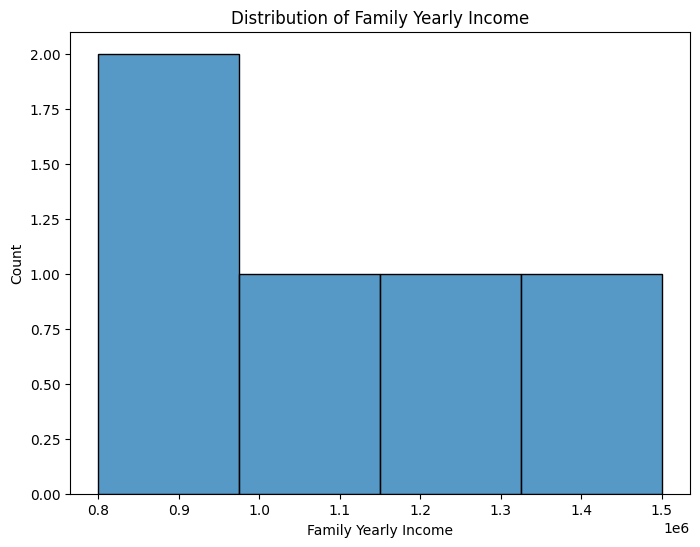

In [16]:
# Distribution of other relevant variables
# For example:
plt.figure(figsize=(8, 6))
sns.histplot(data['FamilyYearIncome'])
plt.title('Distribution of Family Yearly Income')
plt.xlabel('Family Yearly Income')
plt.ylabel('Count')
plt.show()


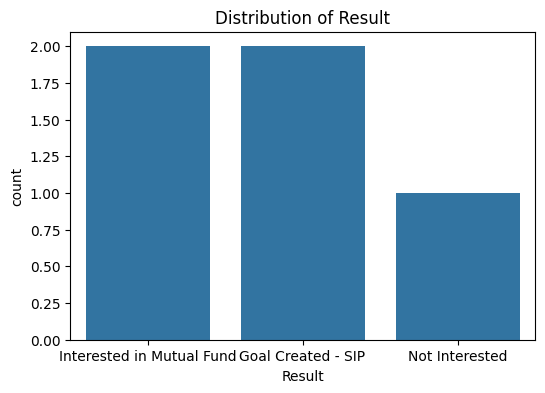

In [21]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Result', data=df)
plt.title('Distribution of Result')
plt.show()


**Task 2: Data Analysis and Modeling**
Analyze the synthetic data to uncover insights about simulated user behavior.
Develop predictive models to identify users likely to create goals and invest.
Use appropriate metrics to evaluate model performance.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [26]:
# Split the data into features (X) and target variable (y)
X = data.iloc[:,:31]
y = data.iloc[:,-1]

In [27]:
X.columns

Index(['StudentAge', 'Goal Amount', 'FamilyYearIncome', 'Identity_Parent',
       'Identity_Student', 'Gender_Female', 'Gender_Male',
       'Location_Bangalore', 'Location_Chennai', 'Location_Delhi',
       'Location_Kolkata', 'Location_Mumbai', 'Other Loans_CarLoan',
       'Other Loans_Home Loan', 'Other Loans_Personal Loan',
       'Current Education Level_Bachelor's',
       'Current Education Level_Master's',
       'Current Education Level_Under Graduate',
       'DesiredEducation_Higher Studies', 'DesiredEducation_Master's',
       'DesiredEducation_PHD', 'DesiredEducation_Short Tearm Course',
       'Preferred Institution_Domestic', 'Preferred Institution_International',
       'Field Of Study_Arts', 'Field Of Study_Engineering',
       'Field Of Study_IT', 'Field Of Study_Medicine',
       'Field Of Study_Science'],
      dtype='object')

In [30]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [32]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

**Finally, let's evaluate the performance of the models:**

In [33]:
# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)


In [35]:
# Model evaluation
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))

print("\nRandom Forest:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy: 1.0

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy: 1.0



**Task 3: Strategy Development
Create a strategy based on model results for targeting users more likely to create goals and invest.**


Based on model results, the strategy for targeting users more likely to create goals and invest could include:

**Personalized Recommendations:** Tailor recommendations based on user preferences, increasing engagement and likelihood of goal creation.

**Incentivized Goal Setting:** Offer rewards or incentives for setting financial goals, motivating users to take action.

**Educational Content:** Provide educational resources on investment options, empowering users to make informed decisions and increase investment likelihood.

**Targeted Communication:** Utilize targeted messaging campaigns to reach users at opportune times, prompting action and goal creation.

**Seamless User Experience:** Streamline the goal creation and investment process within the platform, reducing friction and encouraging user participation.

